In [140]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [160]:
np.random.seed(11)

X = np.linspace(-10, 10, 1000)
y = -10 * X ** 3 + 3 * X**2 - 10 * X + np.random.normal(scale=10, size=X.shape) * 300

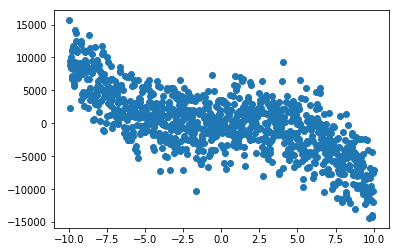

In [161]:
plt.scatter(X, y)

In [162]:
def build_Ti(x):
    Ti = np.zeros((3,3))
    for i in range(3, 0, -1):
        for j in range(3, 0, -1):
            Ti[3-i][3-j] = (x**i) * (x**j)
    return Ti

In [163]:
rs = np.random.RandomState(33)

In [166]:
indices = np.arange(0, 1000)
rs.shuffle(indices)

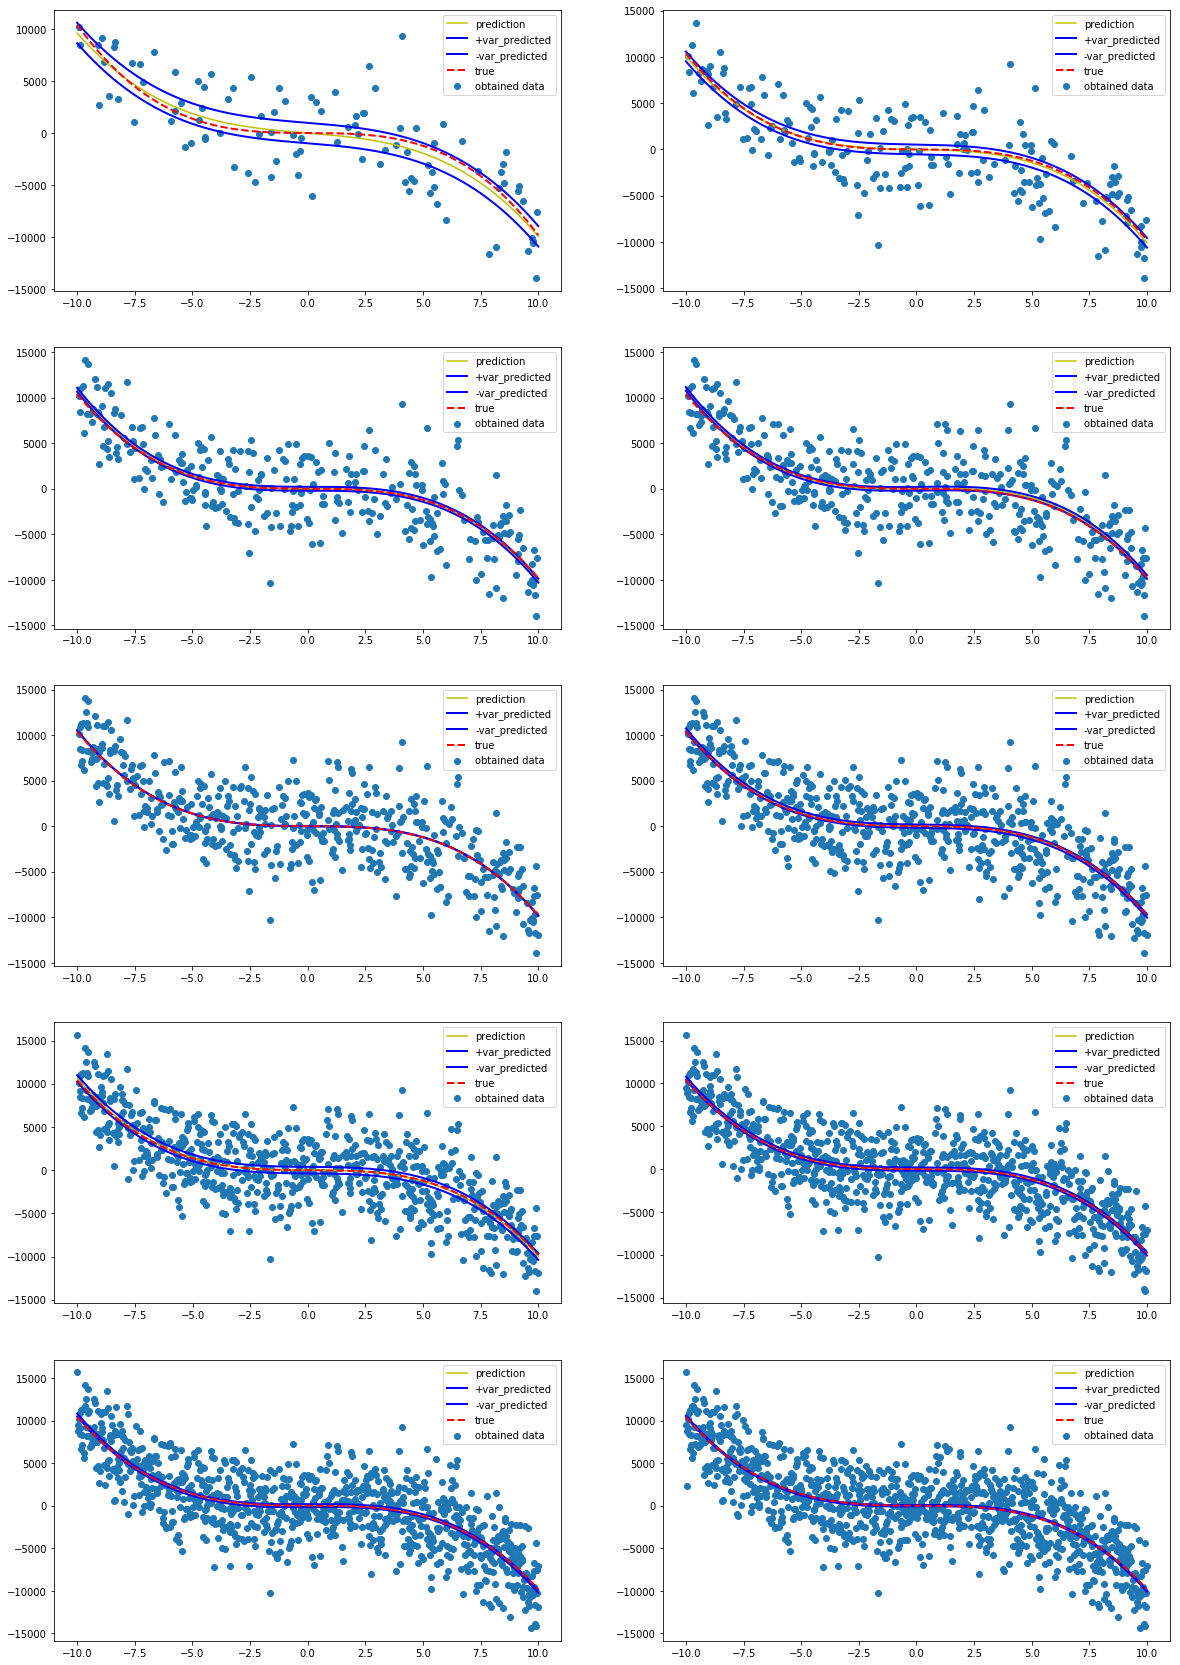

In [167]:
count = 0
coef = np.array([])
T = np.zeros((3,3))
v = np.zeros((3,1))
V = 0
X_train = np.array([])
y_train = np.array([])
ax_idx = 0

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
for i in indices:
    x_, y_ = X[i], y[i]
    Ti = build_Ti(x_)
    vi = y_ * np.array([x_**i for i in range(3, 0 ,-1)])[:, None]
    T += Ti
    v += vi
    V += y_**2
    X_train = np.append(X_train, x_)
    y_train = np.append(y_train, y_)
    count += 1
    if (count%100 == 0):
        coef = np.linalg.inv(T) @ v
        y_hat = np.hstack((X[:, None]**3, X[:, None]**2, X[:, None])) @ coef
        sigma_hat = (V - v.T @ np.linalg.inv(T) @ v) / (count - 3)
        var_f_hat = sigma_hat * np.array([x_**3, x_**2, x_]) @ np.linalg.inv(T) @ np.array([x_**3, x_**2, x_])[:, None]
        ax = axes[ax_idx//2, ax_idx%2]
        ax.scatter(X_train, y_train)
        ax.plot(X, y_hat, c='y')
        ax.plot(X, y_hat + np.sqrt(var_f_hat), c='b', linewidth=2)
        ax.plot(X, y_hat - np.sqrt(var_f_hat), c='b', linewidth=2)
        ax.plot(X, -10 * X ** 3 + 3 * X**2 - 10 * X, 'r--', linewidth=2)
        ax.legend(['prediction', '+var_predicted', '-var_predicted', 'true', 'obtained data'])
        ax_idx += 1